### Линейная регрессия
является методом машинного обучения, позволяющим прогнозировать значение количественного признака в виде линейной комбинации нецелевых принаков с коэффициентами $w$ модели.

Более формально это формулируется так:  
Пусть есть некоторый целевой признак $y$, и известные признаки $X = [x_1, x_2, ... , x_n]$. Тогда предсказать значение $y$ можно с помощью вычисления следующего выражения:

$$
y = w_0 + \sum_{i=1}^{m} {w_i x_i} \tag{1}
$$

При этом от свободного коэффициента $w_0$ можно избавиться, если к признакам $X$ добавить фиктивный константный "признак", равный единице: $X = [1, x_1, x_2, ... , x_n]$.
В таком случае формулу $(1)$ можно переписать:

$$
y = \sum_{i=0}^{m} {w_i x_i}, \tag{2}
$$   

Можно представить формулу $(2)$ в матричном виде, полагая, что $X$ - матрица объектов-признаков, $y$ - вектор столбец целевой переменной, а $w$ - вектор-столбец коэффициентов, получим

$$
\overrightarrow{y} = X \overrightarrow{w} \tag{3}
$$





### Поиск параметров
Очевидно, что в уравнениях $(1 - 3)$ нам известны значения $X$ и $y$ - это константы в некотором роде, так как это обучающая выборка. Чтобы подобрать значения коэффициентов (они же веса) $w$, нам необходима функция ошибки (loss-функция). Выглядит она следующим образом:

$$
MSE\left(\overline{y}, y\right) = \frac{1}{n} \sum_{i=0}^{n} {\left(\overline{y_i} - y_i\right)^2}, \tag{4}
\\
$$
$$
MSE(X, w_0, ... , w_1, y) = \frac{1}{n} \sum_{i=1}^{n} {\left(w_0 + w_1 x_1 + ... + w_n x_n - y_i \right)^2} \tag{5}
$$

Функция ошибки позволяет оценить точность модели в числовом виде - чем меньше ее значение, тем выше точность модели.

### Градиентный спуск

Очевидно, что значение функции ошибки зависит от весов модели, которую мы оцениваем. Соответсвенно задача состоит в том, чтобы найти такие значения весов, при котором значение функции ошибки будет минимальным.

Есть несколько способов минимизации функций нескольких переменных, но мы остановимся на градиентом спуске.

#### Градиент
Уравнение линейной регрессии завит от нескольких переменных (если число признаков больше одного), соответсвенно мы имеем дело с функцией нескольких переменных. Градиент такой функции - это вектор частных производных:
$$
\nabla{y(w_0, w_1, ... , w_n)} = \left({\frac{\partial y}{\partial w_0}}, {\frac{\partial y}{\partial w_1}}, ... , {\frac{\partial y}{\partial w_n}} \right)^T \tag{6}
$$
указывающий направление наискорейшего _роста_ функции

Но нам нужен градиент функции ошибки. В формуле $(6)$ мы привели пример градиента обычной функции, но, нам собственно нужен не он, а градинет $MSE$.  
В формулах $(4)$ и $(5)$ мы вывели уравнения функции ошибки для индивидуальных весов, и для матрицы, соответсвенно в формулах ниже мы рассчитаем градиенты так же для двух случаев:


$$
\mathcal{L} = MSE(w_0, w_1, ... , w_n), \tag{7}\\
\frac{\partial\mathcal{L}}{\partial w_0} = \frac{2}{n} \sum_{i=1}^{n} {\left(w_0 + w_1 x_1 + ... + w_n x_n - y_i\right)}, \\
\frac{\partial\mathcal{L}}{\partial w_j} = \frac{2}{n} \sum_{i=1}^{n} {x_j \left(w_0 + w_1 x_1 + ... + w_n x_n - y_i\right)},\ j \in \{1, \dots , n\}
$$
$$
\mathcal{L} = MSE(\overrightarrow{w}), \tag{8} \\
\frac{\partial\mathcal{L}}{\partial W_j} = \frac{2}{n} \sum_{i=1}^{n} {x_i^j \left(\overline{y}_i - y_i\right)}
$$


Идея **градиентного спуска** заключается в том, чтобы, двигаясь вдоль подсичтанного градиента функции, найти ее минимум или максимум. Как вы читали выше, градиент это направление _роста_ функции, но так как мы хотим найти минимум, то мы будем двигаться в направлении антиградиента, то есть убывания функции.

Собственно, уравнение выглядит вот таким образом:

$$
w_{i+1} = w_i - learning\ rate * \nabla{f(w_i)}
$$

Для того чтобы вычислить значение на следующем шаге, нужно от текущего значения вычесть значение градиента на текущем шаге, умноженное на _шаг_ градиентного спуска $learning\ rate$.

Параметры для начального значения $w$ и $learning\ rate$ подбираются эмпирически - заранее нельзя знать оптимального их значения.

В нашем случае значение $\nabla{f}$ зависит от того, через что вы предпочтете задавать веса - через матрицу или через отдельные значения.




Реализуем простой пример линейной регрессии, с одной зависимой переменной У, и одной независимой переменной х.  
Создадим данные. Зависимость будет такой: $y = 2 * x + 10$

**Hint**
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
- Особенность сложения массивов в питоне:
`[1] + [2,3,4] --> [1,2,3,4]`, `[1,2,3] + [4] --> [1,2,3,4]`

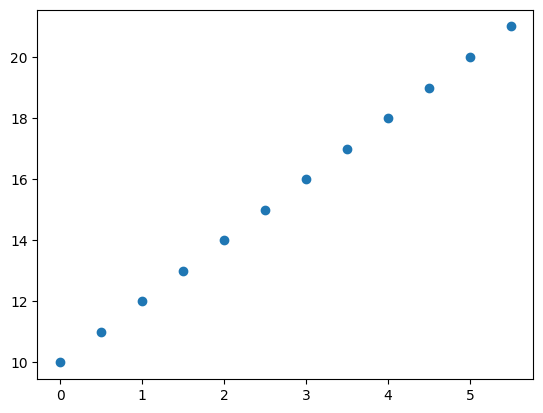

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y = np.array([[2*x[0] + 10] for x in x.tolist()])

plt.scatter(x, y)
plt.show()

Сейчас у нас строго *линейная зависимость*. Добавим немного шума, используя метод `np.random.rand`

Воспользуемся `np.random.seed(someNumber)`, чтобы зафиксировать случайность и получать при перезапуске ячейки
стабильный результат.

**Hint**
- [Доки по np.random](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

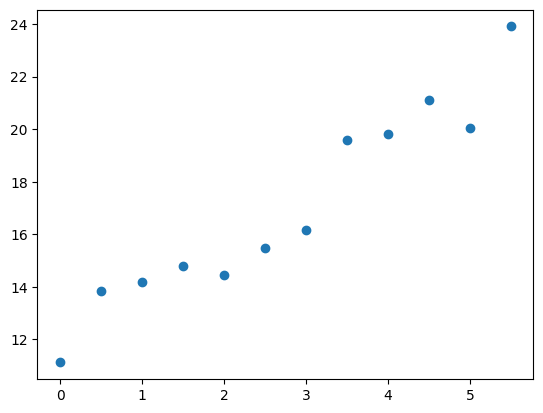

In [2]:
np.random.seed(42)

x = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y = np.array([[2*x[0] + 10 + np.random.rand()*3] for x in x.tolist()])
plt.scatter(x, y)
plt.show()

In [3]:
# Посмотрим на сами данные
print(x)
print(y)

[[0. ]
 [0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]
 [4.5]
 [5. ]
 [5.5]]
[[11.12362036]
 [13.85214292]
 [14.19598183]
 [14.79597545]
 [14.46805592]
 [15.46798356]
 [16.17425084]
 [19.59852844]
 [19.80334504]
 [21.12421773]
 [20.06175348]
 [23.90972956]]


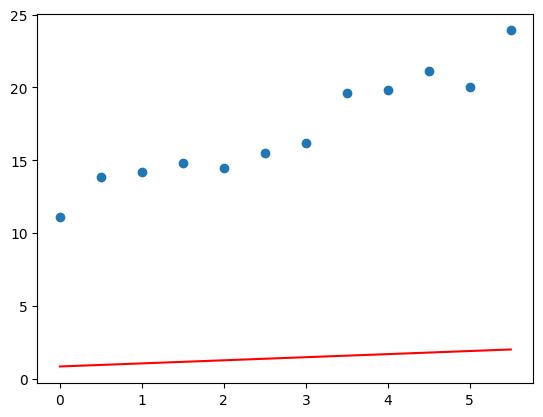

In [4]:
# Объявим параметры: веса и шаг градиентного спуска

w0 = np.random.rand()
w1 = np.random.rand()
step = 0.008

# Как видно, случайно инициализированные веса не очень хорошо приблизили линейную зависимость.
# Точнее вообще никак не приблизили
plt.scatter(x, y)
plt.plot(x, x*w1 + w0, c='red')

Скажем пару слов о графиках. Вы наверное уже поняли, что для двумерного графика нужно задать значения по осям `x` и `y` в виде массива. Есть дополнительный аргумент `c`, отвечающий за цвет элементов на графике.  
Собственно, теперь о типах графиков.  
`scatter` рисует точечную диаграмму, где парам элементов из `x` и `y` будет соответсвовать точка на плоскости.  
`plot` просто рисует линию по заданным точкам.

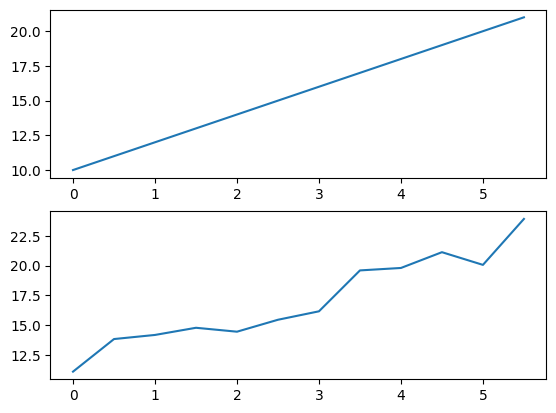

In [5]:
# Это может быть прямая, может быть ломаная линии:

plt.subplot(2, 1, 1)
plt.plot(x, 2*x + 10)

plt.subplot(2,1,2)
plt.plot(x, y)

(4.240464278387851, 3.1314323370502537)

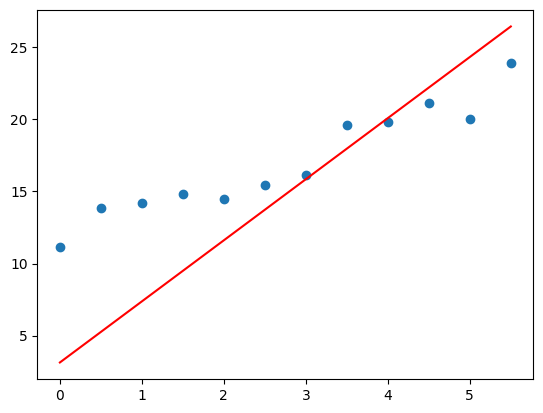

In [6]:
# Реализуем само обучение
# Число шагов для обучения установим в 30

for i in range(30):

    # Предсказание
    pred = x*w1 + w0

    # MSE-loss
    loss = np.sum((y - pred)**2)/x.shape[0]

    # шаг для каждого из весов
    w1 = w1 - step*np.sum((pred - y) * x) * 2 / x.shape[0]
    w0 = w0 - step*np.sum(pred - y) * 2 / x.shape[0]

    # Критерий остановки обучения:
    # разница между значениями MSE меньше, чем на 0.01
    # Вычтем из старого значения лосс-функции новое, полученное уже после обновления весов.
    if np.abs(loss - np.sum((x*w1 + w0 - y)**2) / x.shape[0]) < 0.01:
        print(loss)
        break


# Теперь красная линия приближает данные лучше.
plt.scatter(x, y)
plt.plot(x, x*w1 + w0, c='red')

w1, w0

### Классы в Python

Класс в питоне в целом является таким же классом, с какими вы знакомились в рамках изучения C++ или любого другого языка - это собственный тип, или набор полей с методами доступа к ним и их обработки.

Например, фрагмент простого класса 'число' с методом сложения выглядит так:
```python
class Number:    
    def __init__(self, num):
        self._body = num

    def add(self, num2):
        res = self._body + num2._body
        
        return Number(res)
```

Использование:
```python
n1 = Number(1)
n2 = Number(2)

n3 = n1.add(n2)
# доступ к полю _body
n3._body
```
На что тут важно обратить внимание?  

- **Доступ к полям и методам** класса осуществляется через оператор 'точка': `.`.

- По настоящему **приватных** методов и переменных в питоне нет, но есть специальное соглашение об именовании таких переменных и функций - используйте `_` перед именем переменной или метода. Таким образом, переменная `_body` является 'приватной' для класса `Number`.  

- Методы класса имеют **параметр `self`** на первом месте. Это говорит о том, что функция работает с экземпляром класса, внутри которого была создана. В нашем примере с числом компилятором подразумевается, что `self` в методе `add` - это такой же класс `Number`.

    Рассмотрим это подробнее:  
    При использовании метода обычно пишут так -  
    `экземпляр.метод(аргументы)`.  

    При создании метода пишется так -   
    `def метод(экземпляр, аргументы)`, то есть `self` на первом месте обозначает тот экземпляр класса, для которого будет вызван метод.
    
    Понятно, что `self` является зарезервированным словом (терминальным символом) языка, и, написав, например, `def add(NumberClass, num2)` вы не получите метод, работающий с экземпляром класса - вы получите просто метод, опредлененный внутри класса и требующий для работы два аргумента.


- **Деструкторов** для класса в питоне нет, конструктор объявляется как `__init__(self, ...)`. Конструтор у класса может быть только один, создавать несколько конструкторов (как в `java`, например) нельзя.

- **Поля _экземпляра_ класса** создаются так: `self.MyClassField = 2`  
  Поля _экземпляра_ класса можно создавать только в _методах_ класса.    
  Модификатор `self` играет тут ту же роль, что и в аргументе функции: так мы явно говорим, что переменная `myClassField` не является локальной, а является переменной экземпляра класса.
  
  Если же говорить о **_полях класса_**, то они создаются внутри области видимости _класса_, например в примере ниже `var1` - это переменная класса, а `var2` - переменная _экземпляра_ класса.
  ```python
    class MyClass:
        var1 = 45
        
        def __init__(self, var2_value):
            self.var2 = var2_value
  ```
  Если кратко поговорить об отличиях, то значение переменной _экземпляра_ класса уникально для каждого объекта класса, а значение переменной класса константно для всех объектов такого класса. [Подробнее про это можете почитать тут](https://www.toptal.com/python/python-class-attributes-an-overly-thorough-guide).


[Подробнее про классы в питоне, их сравнение с классами из Java можно прочитать в этой статье](https://habr.com/ru/post/455796/)

В этой справке мы не затронули тему перегрузки операторов класса, так как пока что, для выполнения заданий, это вам не понадобится. Тем не менее, можете почитать про это (необязательно!) [в статье](https://habr.com/ru/post/186608/)

### Задание
Реализовать модели линейной регрессии в виде класса, способного работать как с одномерным набором признаков(как в примере выше), так и с многомерным (когда у нас есть x_1, x_2 и тд).  
Веса желательно задать в виде вектора, X преобразовать, добавив в начало единицу (см. теорию).  
Используйте возможности библиотеки numpy (например, при использовании матриц, пользуйтесь [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [np.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)).

**Учтите**, что признаки - это `numpy`-массивы:  таблицы с данными легко превратить в numpy-массив (это вы увидите позже), а сами по себе такие массивы удобнее, чем стандартные питоновские списки, в первую очередь за счет того, что
- numpy быстрее, чем питон, так как под капотом написан на C,
- в библиотеке реализовано множество полезных методов, в чем вы уже могли убедиться.

Сигнатура класса, который должен у вас получиться:
```python
class linReg:
    def __init__(self, lr = 0.0001, iters = 5000):
        self.lr = lr
        self.iters = iters

    def fit(self, x, y):
        pass
    
    def predict(self, x):
        pass
```
Методы `fit` и `predict` обязательны к реализации, но если у вас появятся какие-нибудь специализированные методы, можете вынести их в приватные методы класса.

**_В ячейках ниже напишите саму реализацию._**  
**Помните**, что все ячейки в Colab имееют общую область видимости.

In [9]:
class linReg:
    def __init__(self, lr=0.0001, iters=5000):
        self.lr = lr  # learning rate
        self.iters = iters  # количество итераций обучения
        self.w = None  # веса модели

    def fit(self, x, y):
        # Добавляем столбец единиц к матрице признаков
        X = np.column_stack((np.ones(x.shape[0]), x))

        # Инициализируем веса случайным образом
        self.w = np.random.rand(X.shape[1])

        # Градиентный спуск
        for _ in range(self.iters):
            # Считаем предсказания
            predictions = np.dot(X, self.w)

            # Вычисляем ошибку
            error = predictions - y

            # Обновляем веса
            self.w -= self.lr * (1/x.shape[0]) * np.dot(X.T, error)

    def predict(self, x):
        # Добавляем столбец единиц для учета смещения (bias)
        X = np.column_stack((np.ones(x.shape[0]), x))

        # Считаем предсказания
        predictions = np.dot(X, self.w)

        return predictions

В ячейке ниже протестируем работу вашей реализации.  
В переменной `linRegInstance` создается экземпляр класса `LinReg`, в конструкторе которого задаются параметры.  
В следующей строке для созданного экземпляра вызвается метод `fit`, которому передаются тренировочные данные и который выполняет обучение модели, то есть находит оптимальные веса.  
В переменную `pred` сохраняется предсказание.

array([6.94500434, 3.23194312])

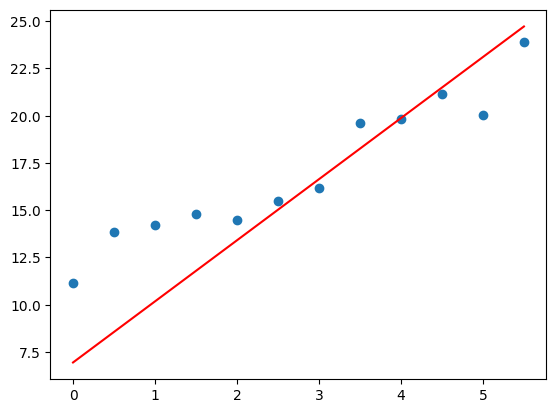

In [10]:
# Checking on example data dataset

from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
np.random.seed(42)

linRegInstance = linReg(iters=3000, lr=0.001)
linRegInstance.fit(x, y.reshape(12))
pred = linRegInstance.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, c='red')

linRegInstance.w

In [11]:
# Проверим размерности
assert pred.shape == np.array(y.reshape(12)).shape

### Проверка на реальном датасете

Загрузим датасет с [прокатами велосипедов](https://www.kaggle.com/c/bike-sharing-demand/data).

Попробуем решить задачу регрессии, и предсказать число прокатов в зависимости от погоды.  
Описание всех признаков:  

```
season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
yr: 0 - 2011, 1 - 2012
mnth: от 1 до 12
holiday: 0 - нет праздника, 1 - есть праздник
weekday: от 0 до 6
workingday: 0 - нерабочий день, 1 - рабочий день
weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
temp: температура в Цельсиях
atemp: температура по ощущениям в Цельсиях
hum: влажность
windspeed(mph): скорость ветра в милях в час
windspeed(ms): скорость ветра в метрах в секунду
cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)
```

Предсказывать мы будем `cnt`, все остальные значения - нецелевые.

In [13]:
# Load data
import pandas as pd

link = 'https://github.com/7bits/ml-courses-7bits/raw/master/01-ml-basics/02-linreg/bikes_rent.csv.gz'
data = pd.read_csv(link)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Как видно, все данные у нас разного масштаба. Нам нужно привести все к одному масштабу, чтобы у нас не было такого большого разброса значений.

Зачем? Ответ заключается в том, что, как мы помним, в линейной регрессии используются взвешенные суммы признаков, соответсвенно, если их значения будут сильно отличаться друг от друга, то это приведет к расхождениям при обучении градиентным спуском.

Взглянем на распределение признаков, используя графики из библиотеки `seaborn`.  
По сути, `seaborn` это некая обертка над `matplotlib`, позволяющая строить чуть более красивые графики.  

Сейчас нам понадобится [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).  
Данный график показывает _распределение плотности_ случайной величины, за которую мы берем столбец таблицы.  

<Axes: xlabel='temp', ylabel='Density'>

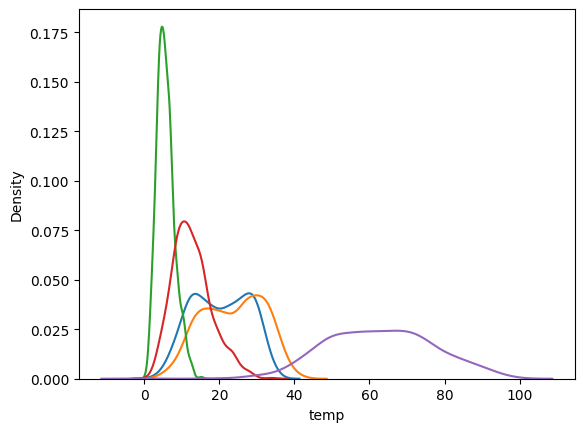

In [14]:
import seaborn as sns

sns.kdeplot(data['temp'])
sns.kdeplot(data['atemp'])
sns.kdeplot(data['windspeed(ms)'])
sns.kdeplot(data['windspeed(mph)'])
sns.kdeplot(data['hum'])

Как мы видим, все весьма неплохо, и величины вроде как укладываются в один масштаб...  
Но, если мы нарисуем вместе не только вещественные (тип `float`) признаки, но и категориальные, то увидим, что все данные имеют разный масштаб, и в таком случае предсказать что-то не представляется возможным.  


Обратите внимание, что мы рисуем только нецелевые признаки - так как значение `cnt` мы будем предсказывать, то мы его тут не учитываем.

Метод [DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) удаляет нужную колонку из датафрейма, и возвращает новый датафрейм, уже без удаляемой колонки. Так как целевой признак `cnt`, то именно его мы и удаляем.

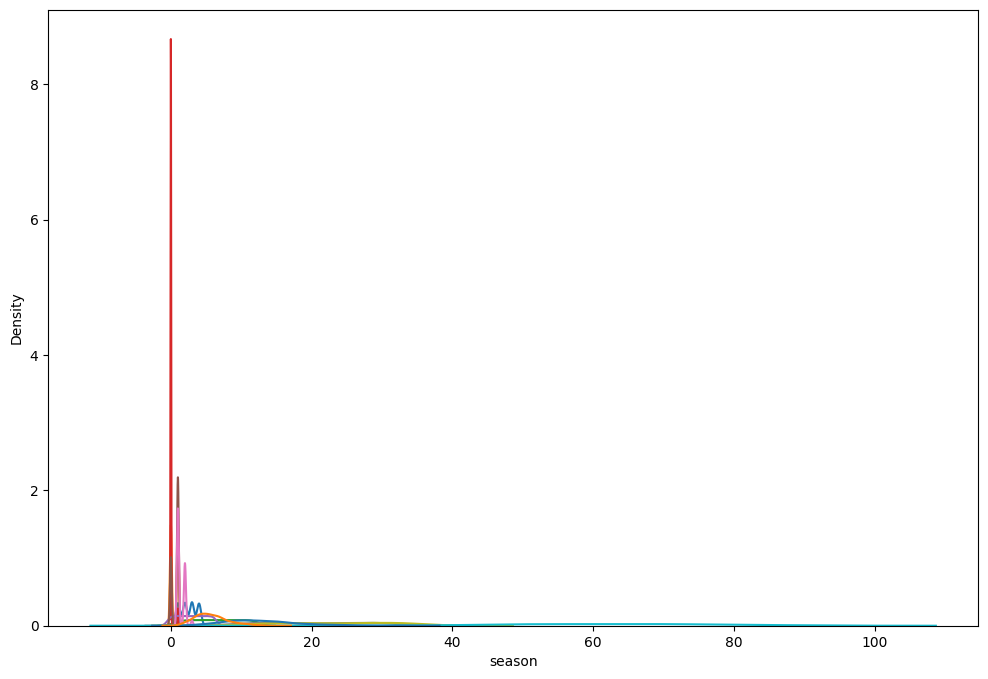

In [15]:
plt.figure(figsize=(12,8))
for i in data.drop(['cnt'], axis=1).columns:
    sns.kdeplot(data[i])

Напишем небольшую реализацию `StandardScaler`. Суть его работы проста: все приводится к нулевому среднему значению, и единичному отклонению.  
Формула:  
$$x_i = \frac{x_i - mean(X)}{std(X)}$$  
где `mean` - среднее, `std` - среднеквадратичное отклонение.  
Соответсвенно после масштабирования `Mean(X) = 0` и `Std(X) = 0`

In [16]:
def StandardScaler(X):
    mean = X - np.mean(X)
    return mean / np.std(X)

In [17]:
# разобьем выборку на целевые и нецелевые признаки
x = data.drop(['cnt'], axis=1)
y = data['cnt']

In [18]:
x_scaled = StandardScaler(x)
x_scaled

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-0.826662,-0.679946,1.250171,-0.387892,-0.387892
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-0.721095,-0.740652,0.479113,0.749602,0.749602
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.634657,-1.749767,-1.339274,0.746632,0.746632
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829,-0.389829
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307,-0.046307
...,...,...,...,...,...,...,...,...,...,...,...,...
726,-1.348213,0.998633,1.588660,-0.171981,0.500513,0.679706,1.110427,-1.318665,-1.521108,0.175807,2.061426,2.061426
727,-1.348213,0.998633,1.588660,-0.171981,0.999661,0.679706,1.110427,-1.323224,-1.346690,-0.266238,-0.452131,-0.452131
728,-1.348213,0.998633,1.588660,-0.171981,1.498809,-1.471225,1.110427,-1.323224,-1.424344,0.878392,-0.853552,-0.853552
729,-1.348213,0.998633,1.588660,-0.171981,-1.496077,-1.471225,-0.726048,-1.309558,-1.490049,-1.015664,2.069444,2.069444


Визуализируем теперь отмасштабированные значения, используя тот же `distplot`  
(Это вы можете сделать самостоятельно).  

Видно, что признаки теперь имеют одинаковый масштаб, и их распределение похоже на нормальное.

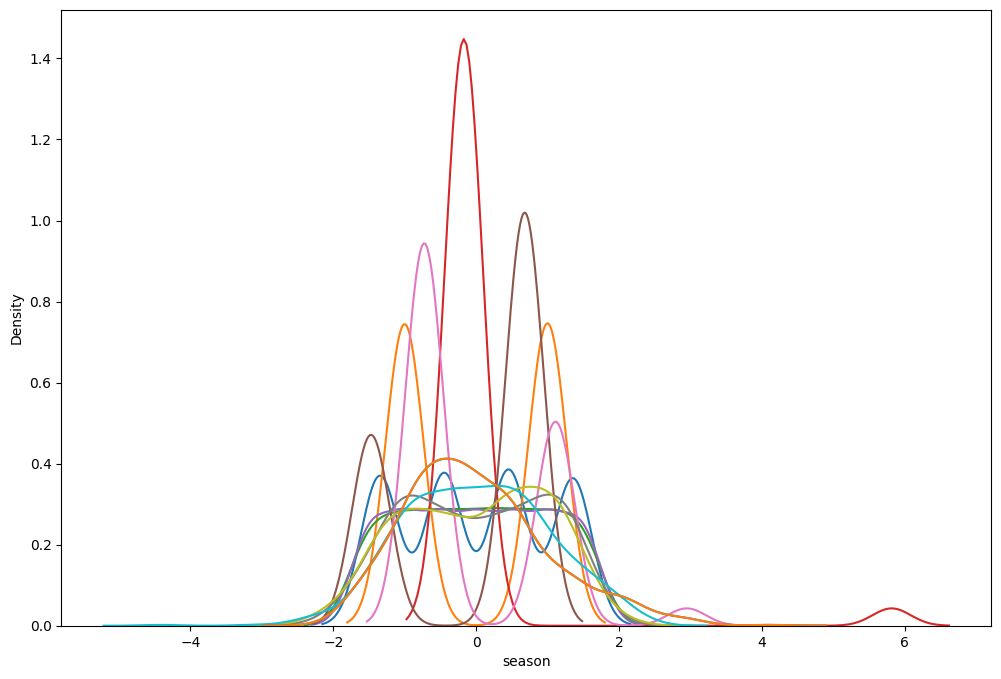

In [19]:
plt.figure(figsize=(12,8))
for i in x_scaled.columns:
    sns.kdeplot(x_scaled[i])

Проверим среднее и отклонение. Поле `values` классов `DataFrame` или `Series` вернет numpy-массив.

In [21]:
print(np.mean(x_scaled.values))
print(np.std(x_scaled.values))

4.6170697604110477e-17
1.0


Среднее должно быть околонулевым значением, а отклонение равно единице.

In [22]:
# переименуем переменные для удобства,
# и превратим данные в numpy-массивы.
x = x_scaled.values
y = y.values


model = linReg(iters=5000, lr=0.001)
model.fit(x, y)
pred = model.predict(x)

Посмотрим на размер предсказаных значений

In [23]:
assert pred.shape == y.shape, "Неправильные размеры"

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------


Оценка за задание высчитывается следующим образом исходя из RSS и TSS:

$$
RSS = \sum_{i=1}^{n} {\left(y_i - model(x_i)\right)}^2 \\
TSS = \sum_{i=1}^{n} {\left(y_i - \overline{y}\right)}^2,\ где\ \overline{y}\ -\ среднее, \\
total\ score = 1 - \frac{RSS}{TSS}
$$

Собственно, точно так же оценивается качество линейной регрессии в библиотеке `sklearn`.

Если Ваш $total\ score$ выше либо равен 0.79, то оценка - 100 баллов.   
Если Ваш $total\ score$ выше либо равен 0.69, то оценка - 85 баллов  
Если Ваш $total\ score$ выше либо равен 0.55, то оценка - 70 баллов  
Если Ваш $total\ score$ выше 0.5, то оценка - 40 баллов.  
Если Ваш $total\ score$ равен либо ниже 0.5, то оценка - 0 баллов.  

In [24]:
RSS = ((y - pred) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score = 1-RSS/TSS
print(f'Оценка {100 if score >= 0.79 else (85 if score >= 0.69 else (70 if score >= 0.55 else (40 if score > 0.5 else 0)))} баллов')

Оценка 100 баллов


In [25]:
# сравним нашу реализацию с реализацией из Sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
pred_lib = model.predict(x)

RSS = ((y - pred_lib) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score_lib = 1-RSS/TSS
score_lib, score, model.score(x, y)

(0.8005756393449529, 0.7980768928752717, 0.8005756393449529)